In [73]:
# Set up working environment
import numpy as np
import time
import pandas as pd
import matplotlib.pyplot as plt
import random 
import seaborn as sns
import string

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

For this exercise, we are comparing sort times using the quicksort method, the mergesort method, and the bubblesort method. We begin by creating these functions.

In [74]:
def quickSort(array):
  if len(array) < 2:
    # base case, arrays with 0 or 1 element are already "sorted"
    return array
  else:
    # recursive case
    pivot = array[0]
    # sub-array of all the elements less than the pivot
    less = [i for i in array[1:] if i <= pivot]
    # sub-array of all the elements greater than the pivot
    greater = [i for i in array[1:] if i > pivot]
    return quickSort(less) + [pivot] + quickSort(greater)

In [76]:
# Python program for implementation of MergeSort 
def mergeSort(arr): 
    if len(arr) >1: 
        mid = len(arr)//2 #Finding the mid of the array 
        L = arr[:mid] # Dividing the array elements  
        R = arr[mid:] # into 2 halves 
  
        mergeSort(L) # Sorting the first half 
        mergeSort(R) # Sorting the second half 
  
        i = j = k = 0
          
        # Copy data to temp arrays L[] and R[] 
        while i < len(L) and j < len(R): 
            if L[i] < R[j]: 
                arr[k] = L[i] 
                i+=1
            else: 
                arr[k] = R[j] 
                j+=1
            k+=1
          
        # Checking if any element was left 
        while i < len(L): 
            arr[k] = L[i] 
            i+=1
            k+=1
          
        while j < len(R): 
            arr[k] = R[j] 
            j+=1
            k+=1
        return arr

In [78]:
def bubbleSort(arr):
    n = len(arr)
 
    # Traverse through all array elements
    for i in range(n):
 
        # Last i elements are already in place
        for j in range(0, n-i-1):
 
            # traverse the array from 0 to n-i-1
            # Swap if the element found is greater
            # than the next element
            if arr[j] > arr[j+1] :
                arr[j], arr[j+1] = arr[j+1], arr[j]
    return arr 

Now that we have created the sorting functions, we will set the random seed to compare results across tests.

In [80]:
# Set Random Seeds
SEED = np.random.seed(1000)
random.seed(1000)

With that completed, we now want to create 5 different lists of random strings, all with a length of 50 characters. We want the lists to varry in size by 200, 400, 600, 800, and 1000 in terms of length. To do this, we create a function to generate the strings.

In [81]:
# Generate random strings
def gen_string(array_len):
    temp1=[]
    i=0
    while i < array_len:
        temp2 = ''.join(random.choice(string.ascii_lowercase) for n in range(50))
        temp1.append(temp2)
        i+=1
    return temp1

Now we run the function to create the lists for the various sizes. Afterwards we will store the data into a pandas dataframe.

In [82]:
list1 = gen_string(200)
list2 = gen_string(400)
list3 = gen_string(600)
list4 = gen_string(800)
list5 = gen_string(1000)

In [83]:
# Store data into pandas dataframe
df1 = pd.DataFrame({'String': list1})
df2 = pd.DataFrame({'String': list2})
df3 = pd.DataFrame({'String': list3})
df4 = pd.DataFrame({'String': list4})
df5 = pd.DataFrame({'String': list5})

Now that we have our lists generated, we will create a function to run the different sort methods. 

In [84]:
# List of sort functions
sorts_array = [quickSort, mergeSort, bubbleSort]

# List of columns to sort
series = ['String']

# Define function to sort & store the data associated with the trials
def run_trial(sel_array):
    # Create an empty list to store results
    sort_results=list([])
    sort_strings=list([])
    sort_timer=list([])
    sort_num=list([])
    
    for i in sorts_array:
        start = time.perf_counter() # Timestamp start
        sort_results.append(sel_array) # Runs the algorithm
        sort_strings.append(i.__name__) # Returns the sort method name as a string
        end = time.perf_counter() # Timestamp finish
        sort_timer.append(round((end - start)*1000,6)) # Convert to milliseconds 
        
    
    return [sort_strings, sort_timer, sort_results] # Returns what was run, the time it was run, and the output

With that function created, we will now run the 5 different tests to see how long each one will take in terms of miliseconds.

In [98]:
# Run the first trial
results = run_trial(df1[series[0]])

# Store the performance outputs for analysis
df_results1 = pd.DataFrame({'sort_method': results[0],
                           'timer': results[1],
                           'sorted_by': series[0],
                           'length': 200})

# Store the actual sorted results 
output_run1 = pd.DataFrame({results[0][0]: results[2][0],
                          results[0][1]: results[2][1],
                          results[0][2]: results[2][2]})

In [99]:
# Run the second trial
results = run_trial(df2[series[0]])

# Store the performance outputs for analysis
df_results2 = pd.DataFrame({'sort_method': results[0],
                           'timer': results[1],
                           'sorted_by': series[0],
                           'length': 400})

# Store the actual sorted results 
output_run2 = pd.DataFrame({results[0][0]: results[2][0],
                          results[0][1]: results[2][1],
                          results[0][2]: results[2][2]})

In [100]:
# Run the third trial
results = run_trial(df3[series[0]])

# Store the performance outputs for analysis
df_results3 = pd.DataFrame({'sort_method': results[0],
                           'timer': results[1],
                           'sorted_by': series[0],
                           'length': 600})

# Store the actual sorted results 
output_run3 = pd.DataFrame({results[0][0]: results[2][0],
                          results[0][1]: results[2][1],
                          results[0][2]: results[2][2]})


In [101]:
# Run the fourth trial
results = run_trial(df4[series[0]])

# Store the performance outputs for analysis
df_results4 = pd.DataFrame({'sort_method': results[0],
                           'timer': results[1],
                           'sorted_by': series[0],
                           'length': 800})

# Store the actual sorted results 
output_run4 = pd.DataFrame({results[0][0]: results[2][0],
                          results[0][1]: results[2][1],
                          results[0][2]: results[2][2]})


In [102]:
# Run the fifth trial
results = run_trial(df1[series[0]])

# Store the performance outputs for analysis
df_results5 = pd.DataFrame({'sort_method': results[0],
                           'timer': results[1],
                           'sorted_by': series[0],
                           'length': 1000})

# Store the actual sorted results 
output_run5 = pd.DataFrame({results[0][0]: results[2][0],
                          results[0][1]: results[2][1],
                          results[0][2]: results[2][2]})

With all the trials ran, we will now create a dataframe to concatenate all the results together.

In [103]:
# Concatenate the dataframes
df_master = pd.concat([df_results1, df_results2, df_results3, df_results4, df_results5])
df_master

,sort_method,timer,sorted_by,length
0,quickSort,0.0018,String,200
1,mergeSort,0.0011,String,200
2,bubbleSort,0.0007,String,200
0,quickSort,0.0009,String,400
1,mergeSort,0.0006,String,400
2,bubbleSort,0.0003,String,400
0,quickSort,0.0014,String,600
1,mergeSort,0.0009,String,600
2,bubbleSort,0.0009,String,600
0,quickSort,0.0017,String,800


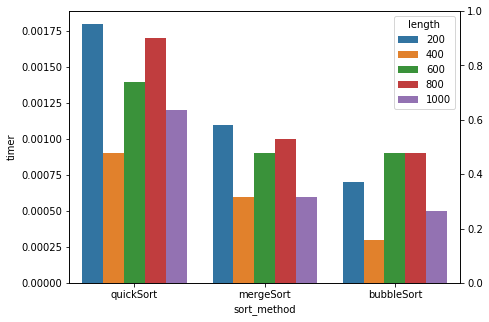

In [104]:
fig, ax1 = plt.subplots(figsize=(7,5))
ax2=ax1.twinx()
sns.barplot(x='sort_method', y='timer', data=df_master, hue='length',ax=ax1)
plt.show()

Executive Summary:

For this exercise we compared the sorting times for three different sort methods: Quick sort, merge sort, and bubble sort. We compared these sorting times against multiple different lists of randomly generated strings, each string being 50 characters long. As we can see in the chart above, bubble sort performed the best overall, after that merge sort performed second best and then quick sort was the worst. This does follow what we would expect in terms of Big O Notation.